In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv('/content/sample_data/auto-mpg.csv',header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

print(df.head())
print(df.tail())
print(df.shape)
print(df.info())

    mpg  cylinders  displacement  ... model year  origin                       name
0  18.0          8         307.0  ...         70       1  chevrolet chevelle malibu
1  15.0          8         350.0  ...         70       1          buick skylark 320
2  18.0          8         318.0  ...         70       1         plymouth satellite
3  16.0          8         304.0  ...         70       1              amc rebel sst
4  17.0          8         302.0  ...         70       1                ford torino

[5 rows x 9 columns]
      mpg  cylinders  displacement  ... model year  origin             name
393  27.0          4         140.0  ...         82       1  ford mustang gl
394  44.0          4          97.0  ...         82       2        vw pickup
395  32.0          4         135.0  ...         82       1    dodge rampage
396  28.0          4         120.0  ...         82       1      ford ranger
397  31.0          4         119.0  ...         82       1       chevy s-10

[5 rows x 9 colum

In [ ]:
print(df.describe())#산술데이터만
print(df.describe(include='all'))#산술아닌것도

              mpg   cylinders  ...  model year      origin
count  398.000000  398.000000  ...  398.000000  398.000000
mean    23.514573    5.454774  ...   76.010050    1.572864
std      7.815984    1.701004  ...    3.697627    0.802055
min      9.000000    3.000000  ...   70.000000    1.000000
25%     17.500000    4.000000  ...   73.000000    1.000000
50%     23.000000    4.000000  ...   76.000000    1.000000
75%     29.000000    8.000000  ...   79.000000    2.000000
max     46.600000    8.000000  ...   82.000000    3.000000

[8 rows x 7 columns]
               mpg   cylinders  ...      origin        name
count   398.000000  398.000000  ...  398.000000         398
unique         NaN         NaN  ...         NaN         305
top            NaN         NaN  ...         NaN  ford pinto
freq           NaN         NaN  ...         NaN           6
mean     23.514573    5.454774  ...    1.572864         NaN
std       7.815984    1.701004  ...    0.802055         NaN
min       9.000000    3.000

In [ ]:
print(df.count())#각 열의 원소 개수
unique_values = df['origin'].value_counts()#원산지의 각 열의 고유값의 갯수
print(unique_values)

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model year      398
origin          398
name            398
dtype: int64
1    249
3     79
2     70
Name: origin, dtype: int64


In [ ]:
print(df.mean())
print(df['mpg'].mean())
print(df.mpg.mean())
print(df[['mpg','weight']].mean())

mpg               23.514573
cylinders          5.454774
displacement     193.425879
weight          2970.424623
acceleration      15.568090
model year        76.010050
origin             1.572864
dtype: float64
23.514572864321615
23.514572864321615
mpg         23.514573
weight    2970.424623
dtype: float64


In [ ]:
print(df.max())#반대는 min()
print(df[['mpg','weight']].max())

mpg                         46.6
cylinders                      8
displacement                 455
horsepower                     ?
weight                      5140
acceleration                24.8
model year                    82
origin                         3
name            vw rabbit custom
dtype: object
mpg         46.6
weight    5140.0
dtype: float64


In [ ]:
print(df.std())
print(df.corr())
print(df[['mpg','weight']].corr())

mpg               7.815984
cylinders         1.701004
displacement    104.269838
weight          846.841774
acceleration      2.757689
model year        3.697627
origin            0.802055
dtype: float64
                   mpg  cylinders  ...  model year    origin
mpg           1.000000  -0.775396  ...    0.579267  0.563450
cylinders    -0.775396   1.000000  ...   -0.348746 -0.562543
displacement -0.804203   0.950721  ...   -0.370164 -0.609409
weight       -0.831741   0.896017  ...   -0.306564 -0.581024
acceleration  0.420289  -0.505419  ...    0.288137  0.205873
model year    0.579267  -0.348746  ...    1.000000  0.180662
origin        0.563450  -0.562543  ...    0.180662  1.000000

[7 rows x 7 columns]
             mpg    weight
mpg     1.000000 -0.831741
weight -0.831741  1.000000


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "/boot/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
df = pd.read_excel('/boot/시도별 전출입 인구수.xlsx', header=0)
print(df.head())

   전출지별   전입지별      1970      1971  ...      2014      2015      2016      2017
0  전출지별   전입지별  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)
1    전국     전국   4046536   4210164  ...   7629098   7755286   7378430   7154226
2   NaN  서울특별시   1742813   1671705  ...   1573594   1589431   1515602   1472937
3   NaN  부산광역시    448577    389797  ...    485710    507031    459015    439073
4   NaN  대구광역시         -         -  ...    350213    351424    328228    321182

[5 rows x 50 columns]


In [ ]:
df = df.fillna(method='ffill')#누락데이터를 앞의 것으로 채움
#서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별']=='서울특별시') & (df['전입지별']!='서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'},axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

print(df.head())
print(df_seoul.head())

   전출지별   전입지별      1970      1971  ...      2014      2015      2016      2017
0  전출지별   전입지별  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)
1    전국     전국   4046536   4210164  ...   7629098   7755286   7378430   7154226
2    전국  서울특별시   1742813   1671705  ...   1573594   1589431   1515602   1472937
3    전국  부산광역시    448577    389797  ...    485710    507031    459015    439073
4    전국  대구광역시         -         -  ...    350213    351424    328228    321182

[5 rows x 50 columns]
          1970     1971     1972     1973  ...     2014     2015     2016     2017
전입지                                        ...                                    
전국     1448985  1419016  1210559  1647268  ...  1661425  1726687  1655859  1571423
부산광역시    11568    11130    11768    16307  ...    17320    17009    15062    14484
대구광역시        -        -        -        -  ...    10062    10191     9623     8891
인천광역시        -        -        -        -  ...    43212    44915    43745    40485

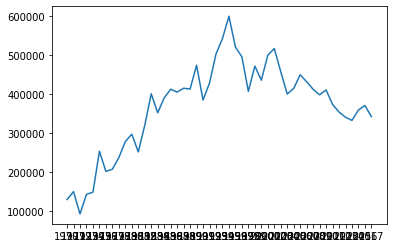

In [ ]:
sr_one=df_seoul.loc['경기도']
plt.plot(sr_one.index,sr_one.values)#OR plt.plot(sr_one)


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


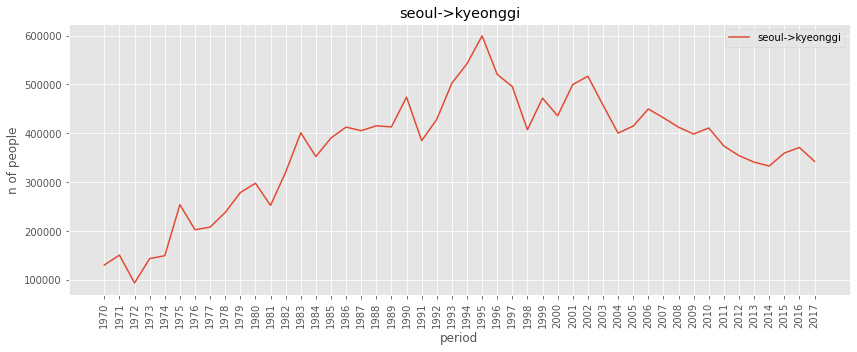

In [ ]:
sr_one=df_seoul.loc['경기도']
plt.figure(figsize=(14,5))
plt.xticks(rotation='vertical')
plt.plot(sr_one.index, sr_one.values)
plt.title('seoul->kyeonggi')
plt.xlabel('period')
plt.ylabel('n of people')
plt.legend(labels=['seoul->kyeonggi'],loc='best')
plt.show()

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


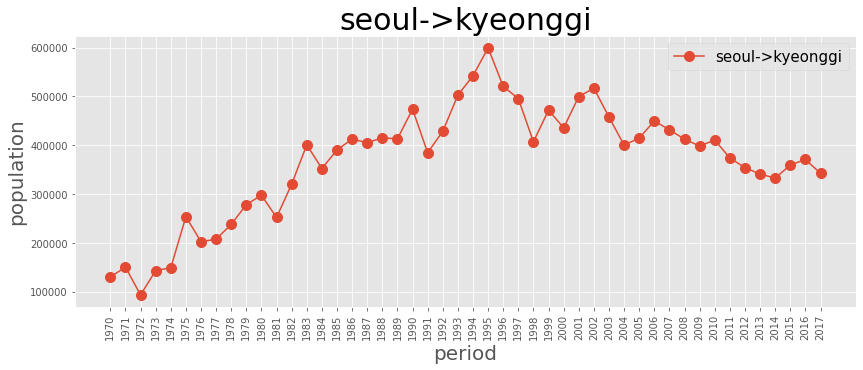

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.xticks(size=10,rotation='vertical')
plt.plot(sr_one.index,sr_one.values,marker='o',markersize=10)

plt.title('seoul->kyeonggi',size=30)
plt.xlabel('period',size=20)
plt.ylabel('population',size=20)
plt.legend(labels=['seoul->kyeonggi'],loc='best',fontsize=15)
plt.show()

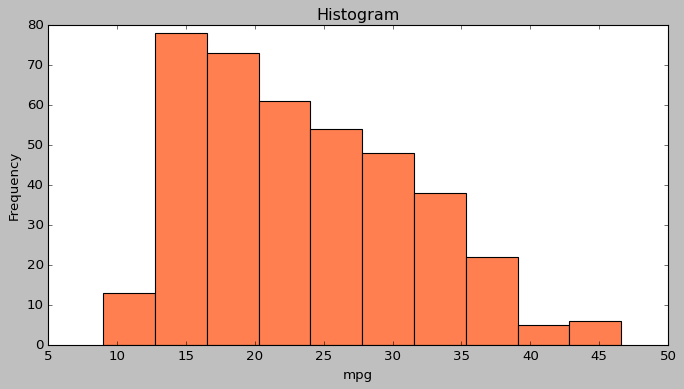

In [ ]:
plt.style.use('classic')
df = pd.read_csv('/boot/auto-mpg.csv',header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
df['mpg'].plot(kind='hist',bins=10,color='coral',figsize=(10,5))
plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

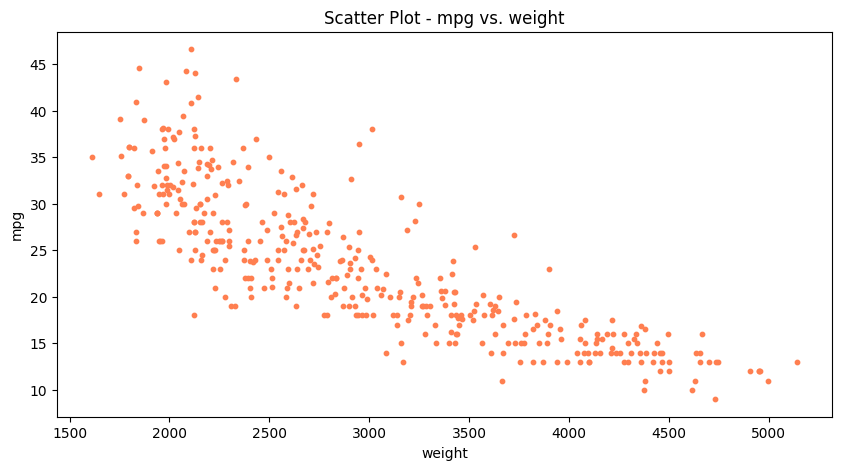

In [ ]:
plt.style.use('default')
df.plot(kind='scatter',x='weight',y='mpg',c='coral',s=10,figsize=(10,5))
plt.title('Scatter Plot - mpg vs. weight')
plt.show()

In [ ]:
df['count']=1
df_origin = df.groupby('origin').sum()
print(df_origin.head())

           mpg  cylinders  displacement  ...  acceleration  model year  count
origin                                   ...                                 
1       5000.8       1556       61229.5  ...        3743.4       18827    249
2       1952.4        291        7640.0  ...        1175.1        5307     70
3       2405.6        324        8114.0  ...        1277.6        6118     79

[3 rows x 7 columns]


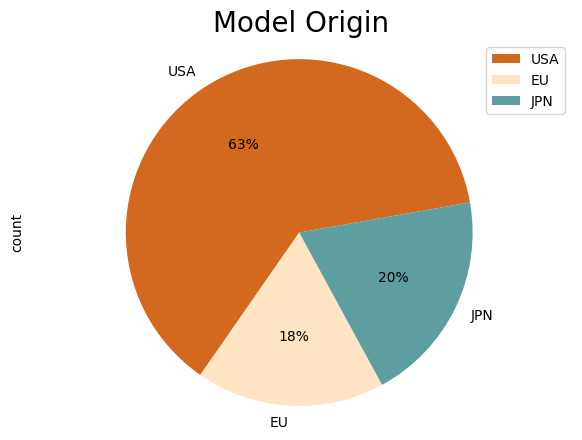

In [ ]:
df_origin.index = ['USA','EU','JPN']
df_origin['count'].plot(kind='pie',
                        figsize=(7,5), autopct='%1.lf%%',
                        startangle=10, colors=['chocolate','bisque','cadetblue'])
plt.title('Model Origin',size=20)
plt.axis('equal')
plt.legend(labels=df_origin.index, loc='upper right')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
titanic = sns.load_dataset('titanic')

print(titanic.head())

   survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0         0       3    male  22.0  ...   NaN  Southampton     no  False
1         1       1  female  38.0  ...     C    Cherbourg    yes  False
2         1       3  female  26.0  ...   NaN  Southampton    yes   True
3         1       1  female  35.0  ...     C  Southampton    yes  False
4         0       3    male  35.0  ...   NaN  Southampton     no   True

[5 rows x 15 columns]


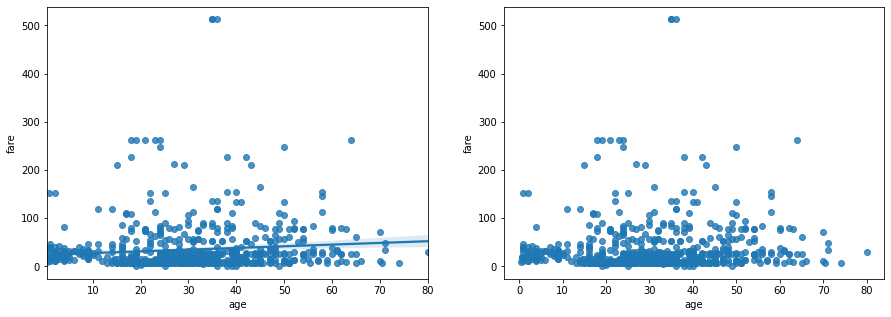

In [ ]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x='age', y='fare', data=titanic, ax=ax1)
sns.regplot(x='age', y='fare', data=titanic, ax=ax2, fit_reg = False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

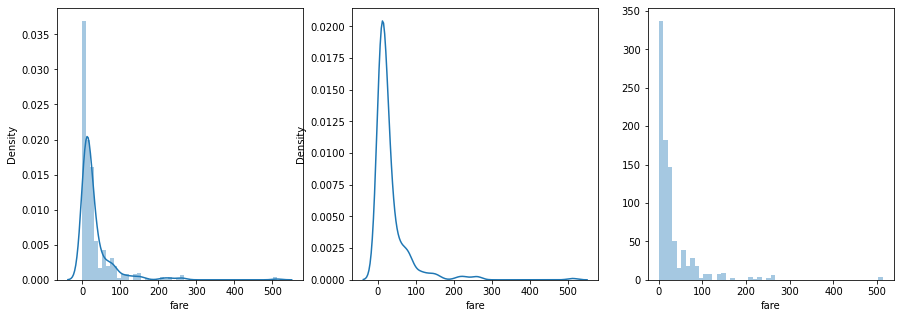

In [ ]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.distplot(titanic['fare'],ax=ax1)
sns.distplot(titanic['fare'],hist=False, ax=ax2)
sns.distplot(titanic['fare'],kde=False, ax=ax3)